# Week 16.1 Overfitting, Test and Validation

## Evaluating Classification

## Fitting The Data

## Using Scikit-Learn

sklearn's train_test_split function allows you to easily split your dataset into a training and test set. Typically in machine learning it is common practice to split the data 60/20/20 for training, validation, and test set respectively. The code below downloads the MNIST dataset. It returns and training and a test set, we take the training set and split it 80/20 and can use the 20% has a validation set.

In [52]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
# By splitting the training set we should have 48000 samples for training and 12000 for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)
print("Training data size")
print(x_train.shape)
print(y_train.shape)
print()
print("Validation data size")
print(x_val.shape)
print(y_val.shape)
print()
print("Testing data size")
print(x_test.shape)
print(y_test.shape)

Training data size
(48000, 28, 28)
(48000,)

Validation data size
(12000, 28, 28)
(12000,)

Testing data size
(10000, 28, 28)
(10000,)


# Explore 

The MNIST is a dataset containing 60000 images of size (28, 28) of a number between 0 and 9, so we have 10 possible classes. If we want to make sure our training set contains enough examples for each class we can check the frequency of each class in our training data. Each class is represented as an integer from 0 to 9. Since we are working with numpy we can use np.bincount to count the number of times each class occurs. The array returned is the count of the class, where the class is the index of the array entry. By plotting it out we wee that the classes are equally distributed for training.

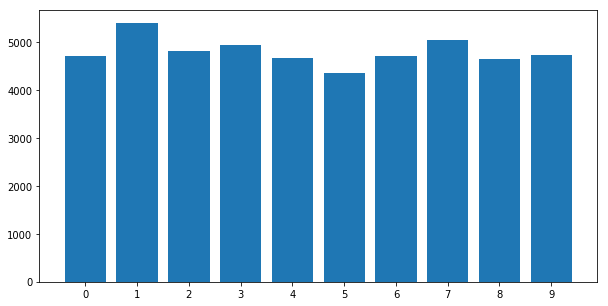

In [64]:
counts = np.bincount(y_train.reshape(48000,))
class_freqs = dict(enumerate(counts))

plt.figure(figsize=(10, 5))
plt.bar(range(len(class_freqs)), list(class_freqs.values()))
plt.xticks(range(len(class_freqs)), list(class_freqs.keys()))
plt.show()

If this was a much larger dataset it would have been better to draw samples from the dataset and then take a look at this sample. In the case of having unequal representation in the dataset we could utilize stratified sampling by breaking the dataset into groups, such as breaking the data into batches of size K and then uniformly sample n times from each batch (n would have to be smaller than K). This helps with observing any class that may be a rarity in the dataset and could also help with prototyping and testing since we would be working with a smaller dataset.

# Handling Missing Features

Dropping samples with missing values is okay for datasets that are large, but if we have many samples with missing values or if the dataset is small it would be more ideal to try to predict those missing values from other features. Besides setting these missing values as the minimum, maximum, mean, or median of that feature column we could look at a correlation matrix of size N x N, where N is the number of features, and find which features are more correlated with the feature column containing the missing values. If we find features that have high correlation with the missing features than the missing features are redundant because the correlated columns then contain a lot of information about the behavior of the missing feature. If no correlations are found we can throw the non-missing features into a model and use them to predict the missing features.

# Feature Scaling: min-max and Standardization

When scaling features we need to make sure the features don't have different scales. One way to scale the features is to use min-max scaling which compresses the features to be in the interval $[0,1]$. Another method is standardize the features by z-score normalization. This converts to features to be described as steps above or below the mean of the specific feature and is not bounded like min-max scaling.

It is important ot apply the same type of scaling to both the train and test set. This is involves keeping the parameters used for scaling the training set to also scale the test set. One way of doing this is to use StandardScaler from sklearn. We reshape the samples from (28, 28) to (784,) because StandardScaler expects features to be 1-dimensional.

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
scaler = StandardScaler()                        # StandardScaler performs standardization on the data set
scaler.fit_transform(x_train)                    # You can fit the transformation on the training set
    
scaler.transform(x_test)                         # And then use the same transformation parameters obtained from the 
                                                 # training set on the test set

In [ ]:
# You can access the means and variance for each feature
scaler.mean_
scaler.var_